<a href="https://colab.research.google.com/github/gomdoori/AI/blob/main/RNN(%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim

In [2]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader

In [3]:
#디바이스 할당
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_root_train = 'drive/MyDrive/Colab Notebooks/Deeplearning/ex/train'
data_root_test =  'drive/MyDrive/Colab Notebooks//Deeplearning/ex/test'

In [6]:
trans_train = transforms.Compose([
    transforms.Resize((32, 32)),  # 이미지 크기 줄이기
    transforms.ToTensor()
])
train_set = torchvision.datasets.ImageFolder(root = data_root_train,
                                             transform = trans_train)

In [7]:
trans_test = transforms.Compose([
    transforms.Resize((32, 32)),  # 이미지 크기 줄이기
    transforms.ToTensor()
])
test_set = torchvision.datasets.ImageFolder(root = data_root_test,
                                             transform = trans_test)

In [8]:
classes = train_set.classes

----------------------------------- [여기까지가 전처리 과정] -----------------------------------

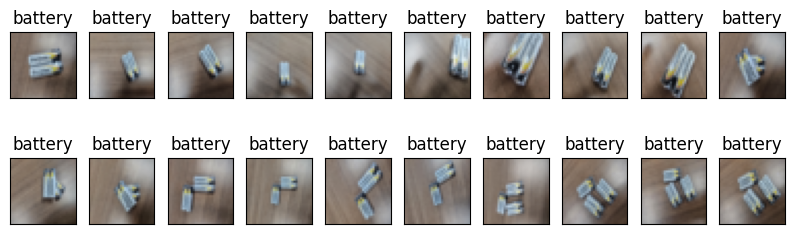

In [9]:
#사진 확인하는 코드 입력하기
plt.figure(figsize=(10,3))
for i in range(20):
  ax = plt.subplot(2, 10, i+1)

  # image와 label 취득
  image, label = train_set[i]

  #이미지 출력
  plt.imshow(np.transpose(image,(1,2,0)))
  ax.set_title(f'{classes[label]}')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
#픽셀 수를 균일화 (resize)
batch_size = 128

train_loader = DataLoader(
    train_set, batch_size= batch_size,
    shuffle = True
)

test_loader = DataLoader(
    test_set, batch_size= batch_size,
    shuffle = False
)

In [12]:
#확인
for images, labels in train_loader:
  break

print(images.shape)
print(labels.shape)

torch.Size([128, 3, 32, 32])
torch.Size([128])


In [13]:
np.transpose(image,(1,2,0)).shape

torch.Size([32, 32, 3])

In [14]:
class CNN1(nn.Module):
  def __init__(self):
    super(CNN1, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2) #사이즈 절반 50*50으로
    )

    self.l1 = nn.Linear(in_features=32*16*16, out_features=50)
    self.l2 = nn.Linear(in_features=50, out_features=10)

    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.layer1(x)

    x = x.view(x.size(0), -1)

    x = self.l1(x)
    x = self.relu(x)
    x = self.l2(x)
    return x

In [15]:
torch.cuda.manual_seed(123)

model = CNN1()
model.to(device)
lr = 1e-3

# 손실 함수 : 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

history= np.zeros((0,5))

In [16]:
num_epochs = 20
#tqdm 라이브러리 임포트
from tqdm.notebook import tqdm
for epoch in range(num_epochs):
  train_acc, train_loss = 0, 0
  test_acc, test_loss = 0, 0
  n_train, n_test = 0, 0

  for images, labels in tqdm(train_loader):
    n_train += len(labels)

    inputs = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss_model = criterion(outputs, labels)
    loss_model.backward()
    optimizer.step()
    pred = outputs.max(axis=1)[1]
    train_loss += loss_model.item()
    train_acc += (pred == labels).sum().item()

  for images_test, labels_test in test_loader:
    n_test += len(labels_test)

    inputs_test = images_test.to(device)
    labels_test = labels_test.to(device)

    outputs_test = model(inputs_test)

    loss_test_model = criterion(outputs_test, labels_test)

    pred_test = outputs_test.max(axis=1)[1]

    test_loss += loss_test_model.item()
    test_acc += (pred_test == labels_test).sum().item()

  train_acc = train_acc / n_train
  test_acc = test_acc / n_test
  train_loss = train_loss / n_train
  test_loss = test_loss / n_test
  print(f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f}, loss_test: {test_loss:.5f}')
  item = np.array([epoch+1, train_loss, train_acc, test_loss, test_acc])
  history = np.vstack((history, item))

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [1/20], loss: 0.03102, loss_test: 0.04926


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [2/20], loss: 0.02424, loss_test: 0.04291


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [3/20], loss: 0.01817, loss_test: 0.04075


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [4/20], loss: 0.01279, loss_test: 0.05973


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [5/20], loss: 0.02363, loss_test: 0.06127


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [6/20], loss: 0.02813, loss_test: 0.04086


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [7/20], loss: 0.01747, loss_test: 0.04128


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [8/20], loss: 0.01989, loss_test: 0.04341


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [9/20], loss: 0.02124, loss_test: 0.04060


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [10/20], loss: 0.02428, loss_test: 0.03440


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [11/20], loss: 0.01567, loss_test: 0.03511


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [12/20], loss: 0.01588, loss_test: 0.04202


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [13/20], loss: 0.01108, loss_test: 0.04838


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [14/20], loss: 0.01621, loss_test: 0.04925


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [15/20], loss: 0.01249, loss_test: 0.04731


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [16/20], loss: 0.02017, loss_test: 0.04366


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [17/20], loss: 0.01183, loss_test: 0.03944


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [18/20], loss: 0.01398, loss_test: 0.03608


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [19/20], loss: 0.01578, loss_test: 0.03340


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [20/20], loss: 0.01338, loss_test: 0.03206


In [17]:
# 손실과 정확도 확인

print(f'초기상태 : 손실 : {history[0,3]:.5f} 정확도 : {history[0,4]:.5f}' )
print(f'최종상태 : 손실 : {history[-1,3]:.5f} 정확도 : {history[-1,4]:.5f}' )

초기상태 : 손실 : 0.04926 정확도 : 0.33333
최종상태 : 손실 : 0.03206 정확도 : 0.73333


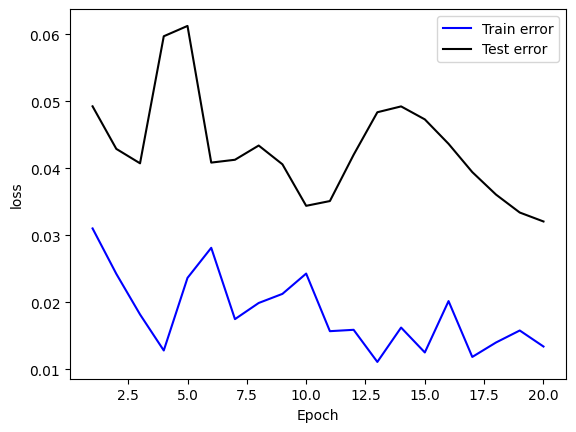

In [18]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b', label='Train error')
plt.plot(history[:,0], history[:,3], 'k', label='Test error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

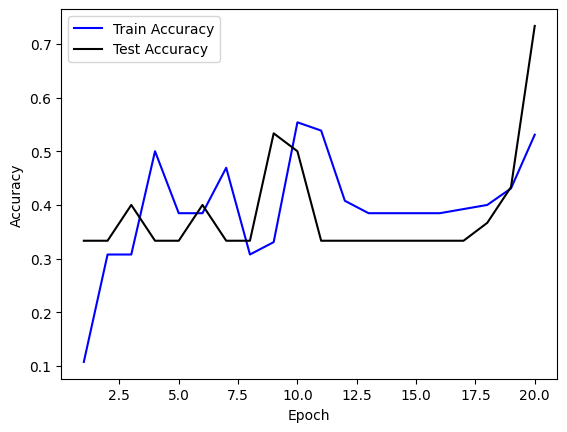

In [19]:
# 학습 곡선 출력(정확도)

plt.plot(history[:,0], history[:,2], 'b', label='Train Accuracy')
plt.plot(history[:,0], history[:,4], 'k', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()